<div>
<img src="https://d1m75rqqgidzqn.cloudfront.net/wp-data/2019/11/07200611/shutterstock_1061069282.jpg" width="750" style="margin: 5px auto; display: block; position: relative; left: -30px;" />
</div>


## Submodule -1.3 : Deep Neural Networks

## Table of Contents
#### 1. [Spectral Biases](#Spectral-Biases)
#### 2. [Activation functions ](#Activation-functions )

# Spectral Biases

In [1]:
from __future__ import print_function

import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
np.random.seed(1234)

In [2]:
## Input Function and Fourier Transform

# Function Definitions
def fun_x(x):
    if x < 0.:
        f = 5.0 + np.sin(x) + np.sin(2.*x) + np.sin(3.*x) + np.sin(4.*x)
    else:
        f = np.cos(10.*x)
    return f

## Fourier Transform of 1D Routine
def F_transform(fun):
    F_t = np.fft.fft(fun)
    return F_t

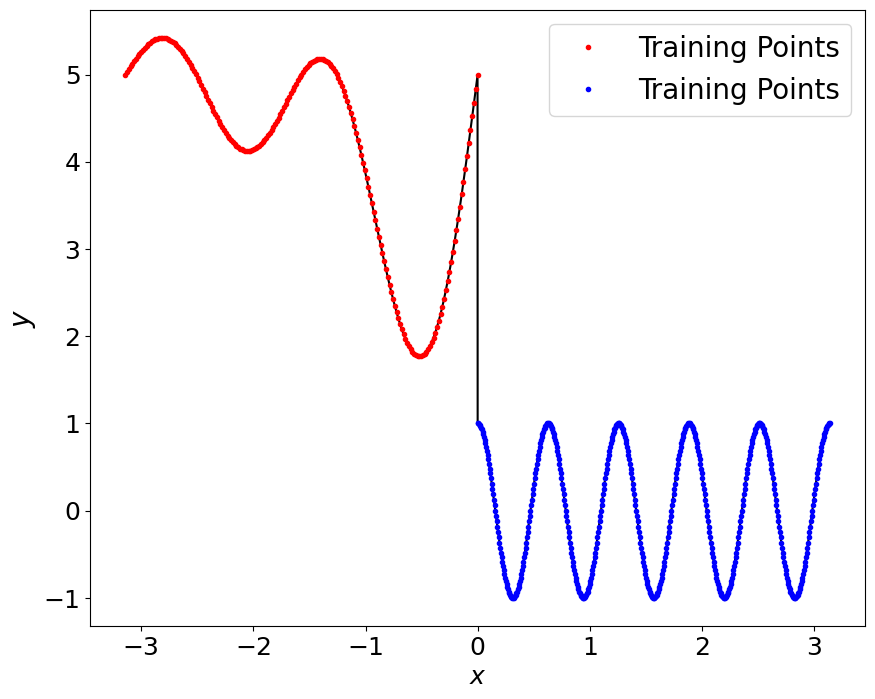

In [3]:
fig, ax1 = plt.subplots(1, 1, figsize=(10,8))
x_in_l = np.linspace(-np.pi, -1.0e-3, 201)
x_in_r = np.linspace(0., np.pi, 501)
y_in_l = np.array([fun_x(i) for i in x_in_l])
y_in_r = np.array([fun_x(i) for i in x_in_r])
x_in = np.concatenate((x_in_l, x_in_r), axis=0)
y_in = np.array([fun_x(i) for i in x_in])
ax1.plot(x_in, y_in, 'k-')

ax1.plot(x_in_l, y_in_l, 'r.', label="Training Points")
ax1.plot(x_in_r, y_in_r, 'b.', label="Training Points")
ax1.set_xlabel('$x$',  fontsize=18)
ax1.set_ylabel('$y$', fontsize=20)
ax1.legend(loc=1, prop={'size': 20})
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='minor', labelsize=18)

In [4]:
#### Training Routine

## Neural Network Classes

class Net(nn.Module):
    def __init__(self, input_dim, hidden_layers, num_neurons, output_dim):
        super(Net, self).__init__()
        self.net = nn.Sequential()
        self.net.add_module("lin_layer_0", nn.Linear(input_dim,num_neurons))
        self.net.add_module("tanh_layer_0", nn.Tanh())

        for num in range(1, hidden_layers+1):
            self.net.add_module("lin_layer_%d" %(num), nn.Linear(num_neurons, num_neurons))
            self.net.add_module("tanh_layer_%d", nn.Tanh())

        self.net.add_module("lin_layer_output", nn.Linear(num_neurons, output_dim))
        
    def forward(self, x):
        return self.net(x)



if __name__ == "__main__":
        
    # Data for Traning and Testing
    x = np.linspace(-np.pi, np.pi, 129, dtype=np.float64)
    x = np.reshape(x, (-1, 1))
    y = np.array([fun_x(i) for i in x])

    F_y = F_transform(y[0:-1, 0])
    F_y_abs = abs(F_y)
    x_in_l = np.linspace(-np.pi, -1.0e-3, 201)
    x_in_r = np.linspace(0., np.pi, 501)
    x_in = np.concatenate((x_in_l, x_in_r), axis=0)
    y_in = np.array([fun_x(i) for i in x_in])
    
    
    N_i = 1
    N_o = 1
    L =  2
    N = 40   
    net = Net(N_i, L, N, N_o)    
    x_train = torch.from_numpy(x_in.reshape(-1,1)).float()
    y_train = torch.from_numpy(y_in.reshape(-1,1)).float()
    x_test =  torch.from_numpy(x.reshape(-1,1)).float()
       
    optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-03)
    loss_func = torch.nn.MSELoss()
   
    
    N_iter = 50000 #100000
    loss_f_list = []
    F_y_list = []
    y_p_list = []
    inputs = Variable(x_train)
    outputs = Variable(y_train)
    
    for n in range(N_iter):
        prediction = net(inputs)
        loss = loss_func(prediction, outputs) 
        optimizer.zero_grad()
        loss.backward()        
        optimizer.step()  
        
        if n%100 == 0:
            y_pred= net(x_test)
            y_pred_ = y_pred.data.numpy()
            F_y_ = F_transform(y_pred_[0:-1, 0])
            F_y_abs_ = abs(F_y_)
            F_y_abs_ = np.reshape(F_y_abs_, (-1, 1))
            loss_f = abs(F_y - F_y_)/(1.0e-9 + abs(F_y))
            loss_f = np.reshape(loss_f, (-1, 1))
            y_pred_ = np.reshape(y_pred_, (-1, 1))
            y_p_list.append(y_pred_)
            loss_f_list.append(loss_f)
            F_y_list.append(F_y_abs_)
            print('Steps: %d, loss: %.3e'%(n, loss))
            
            
    loss_f_out = np.concatenate(loss_f_list, axis=1)
    F_y_out = np.concatenate(F_y_list, axis=1)
    y_out = np.concatenate(y_p_list, axis=1)
    y_pred_ = net(x_test)
    
            

Steps: 0, loss: 5.182e+00
Steps: 100, loss: 6.354e-01
Steps: 200, loss: 6.302e-01
Steps: 300, loss: 6.256e-01
Steps: 400, loss: 6.185e-01
Steps: 500, loss: 6.020e-01
Steps: 600, loss: 5.675e-01
Steps: 700, loss: 5.211e-01
Steps: 800, loss: 4.646e-01
Steps: 900, loss: 4.028e-01
Steps: 1000, loss: 3.877e-01
Steps: 1100, loss: 3.774e-01
Steps: 1200, loss: 3.704e-01
Steps: 1300, loss: 3.665e-01
Steps: 1400, loss: 3.643e-01
Steps: 1500, loss: 3.622e-01
Steps: 1600, loss: 3.605e-01
Steps: 1700, loss: 3.587e-01
Steps: 1800, loss: 3.562e-01
Steps: 1900, loss: 3.520e-01
Steps: 2000, loss: 3.448e-01
Steps: 2100, loss: 3.355e-01
Steps: 2200, loss: 3.267e-01
Steps: 2300, loss: 3.195e-01
Steps: 2400, loss: 3.146e-01
Steps: 2500, loss: 3.129e-01
Steps: 2600, loss: 3.088e-01
Steps: 2700, loss: 3.083e-01
Steps: 2800, loss: 3.050e-01
Steps: 2900, loss: 3.033e-01
Steps: 3000, loss: 3.017e-01
Steps: 3100, loss: 3.000e-01
Steps: 3200, loss: 2.984e-01
Steps: 3300, loss: 2.966e-01
Steps: 3400, loss: 2.946e-

In [6]:
l1 = len(y_p_list)
l2 = len(F_y_list)
print(f"Length Test: {l1==l2}")
print(f"l1 is: {l1} and l2: {l2}")
freq = np.arange(0,63,1)

for i in range(0,l1):
    print(f"Making an image at {i} iteration.")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
    ax1.plot(x, y, 'k-', label="Actual Function")
    y_pred_ = y_p_list[i]
    ax1.plot(x, y_pred_, 'r.', markersize=10, label="Predicted Function")
    ax1.title.set_text('Physical Space')
    ax1.set_xlabel('$x$', fontsize=20)
    ax1.set_ylabel('$y$', fontsize=20)
    ax1.legend(loc=1, prop={'size': 20})
    ax1.tick_params(axis='both', which='major', labelsize=18)
    ax1.tick_params(axis='both', which='minor', labelsize=18)
    ax1.legend()
    F_y_ = F_y_list[i]
    F_y_abs_ = abs(F_y_)
    F_y_abs_ = np.reshape(F_y_abs_, (-1, 1))
    ax2.semilogy(freq, F_y_abs[0:63], 'k-', label="Original Spectrum")
    ax2.semilogy(freq, F_y_abs_[0:63], 'r--', markersize=10, label="Predicted Spectrum")
    ax2.title.set_text('Fourier Space')
    ax2.set_xlabel('Frequency')
    ax2.set_ylabel('$\hat{y}$')
    ax2.legend()
    ax2.set_xlabel('$x$', fontsize=20)
    ax2.set_ylabel('$y$', fontsize=20)
    ax2.tick_params(axis='both', which='major', labelsize=18)
    ax2.tick_params(axis='both', which='minor', labelsize=18)
    if i < 10:
        plt.savefig("snap_shots/" + "image_00" + str(i), dpi=150)
    elif i>9 and i < 100:
        plt.savefig("snap_shots/" + "image_0" + str(i), dpi=150)
    else:
        plt.savefig("snap_shots/" + "image_" + str(i), dpi=150)
        
    plt.close(fig)
   
    


Length Test: True
l1 is: 500 and l2: 500
Making an image at 0 iteration.
Making an image at 1 iteration.
Making an image at 2 iteration.
Making an image at 3 iteration.
Making an image at 4 iteration.
Making an image at 5 iteration.
Making an image at 6 iteration.
Making an image at 7 iteration.
Making an image at 8 iteration.
Making an image at 9 iteration.
Making an image at 10 iteration.
Making an image at 11 iteration.
Making an image at 12 iteration.
Making an image at 13 iteration.
Making an image at 14 iteration.
Making an image at 15 iteration.
Making an image at 16 iteration.
Making an image at 17 iteration.
Making an image at 18 iteration.
Making an image at 19 iteration.
Making an image at 20 iteration.
Making an image at 21 iteration.
Making an image at 22 iteration.
Making an image at 23 iteration.
Making an image at 24 iteration.
Making an image at 25 iteration.
Making an image at 26 iteration.
Making an image at 27 iteration.
Making an image at 28 iteration.
Making an im

In [ ]:
#!pip install Pillow

import glob
from PIL import Image


fp_in = "snap_shots/image_*.png"
fp_out = "snap_shots/image.gif"

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=200, loop=0)


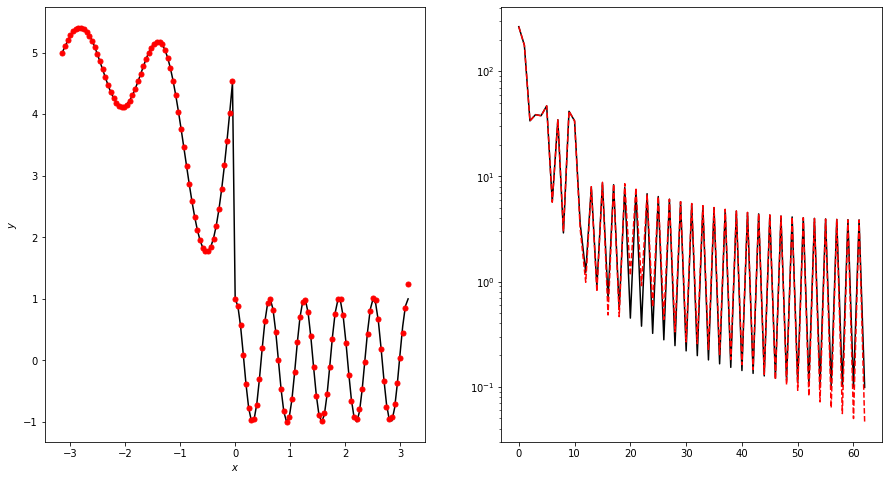

In [ ]:
y_pred_ = net(x_test)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
ax1.plot(x, y, 'k-')
y_pred_ = y_pred.data.numpy()
ax1.plot(x, y_pred_, 'r.', markersize=10)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
#ax1.legend()

freq = np.arange(0,63,1)
F_y_ = F_transform(y_pred_[0:-1, 0])
F_y_abs_ = abs(F_y_)
F_y_abs_ = np.reshape(F_y_abs_, (-1, 1))
ax2.semilogy(freq, F_y_abs[0:63], 'k-')
ax2.semilogy(freq, F_y_abs_[0:63], 'r--', markersize=10)



# Activation functions 

In [ ]:
import numpy as np
import os

def leaky_relu(z, alpha=0.02):
    return np.maximum(alpha*z, z)

def adaptive_leaky_relu(z, alpha=0.02, a=1):
    z=a*z
    return np.maximum(alpha*z, z)


def sigmoid(z):
    return 1/(1+np.exp(-z))

def adaptive_sigmoid(z, a=1):
    z=a*z
    return 1/(1+np.exp(-z))

def tanh(z):
    return (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))

def adaptive_tanh(z, a=1):
    z=a*z
    return (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))

def relu(z):
    return np.maximum(0,z)

def adaptive_relu(z, a=1):
    z=a*z
    return np.maximum(0,z)

def elu(z):
    output=[]
    for element in z:
        if element<0:
            output.append(np.exp(element)-1)
        else:
            output.append(element)
    return output

def adaptive_elu(z, a=1):
    z=a*z
    output=[]
    for element in z:
        if element<0:
            output.append(np.exp(element)-1)
        else:
            output.append(element)
    return output

def sin(z):
    return np.sin(z)

def adaptive_sin(z, a=1):
    z=a*z
    return np.sin(z)

def swish(z):
    return z*sigmoid(z)

def adaptive_swish(z, a=1):
    z=a*z
    return z*sigmoid(z)

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Unit1"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


In [ ]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure leaky_relu_plot


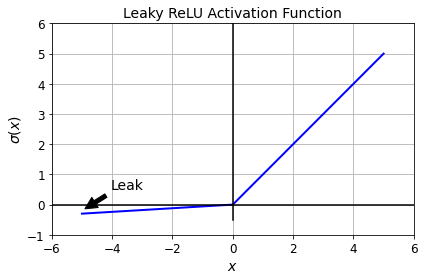

In [ ]:
z = np.linspace(-5, 5, 400)
plt.plot(z, leaky_relu(z, 0.06), "b-", linewidth=2)
plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 6], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU Activation Function", fontsize=14)
plt.axis([-6, 6, -1.0, 6.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
save_fig("leaky_relu_plot")
plt.show()

Saving figure sigmoid_plot


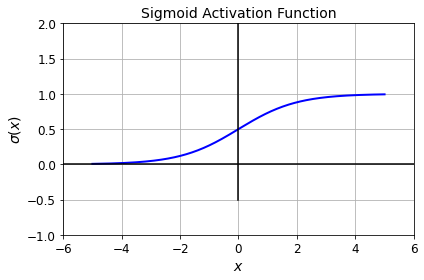

In [ ]:
z = np.linspace(-5, 5, 400)
plt.plot(z, sigmoid(z), "b-", linewidth=2)
plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 6], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
#plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Sigmoid Activation Function", fontsize=14)
plt.axis([-6, 6, -1.0, 6.0])
plt.ylim(-1,2)

plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')

save_fig("sigmoid_plot")
plt.show()

Saving figure tanh_plot


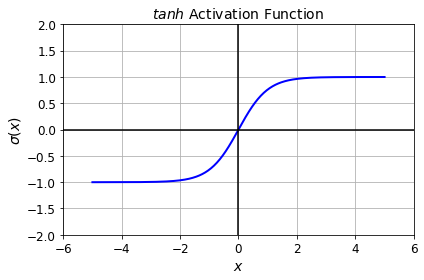

In [ ]:
z = np.linspace(-5, 5, 400)
plt.plot(z, tanh(z), "b-", linewidth=2)
plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-2, 6], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
#plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("$\mathit{tanh}$ Activation Function", fontsize=14)
plt.axis([-6, 6, -2.0, 6.0])
plt.ylim(-2,2)

plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')

save_fig("tanh_plot")
plt.show()

Saving figure relu_plot


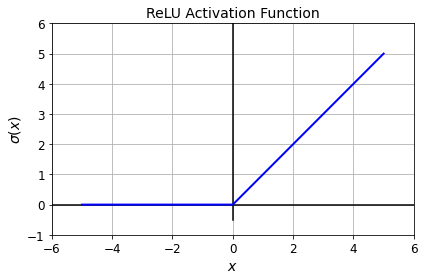

In [ ]:
z = np.linspace(-5, 5, 400)
plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 6], 'k-')
plt.plot(z, relu(z), "b-", linewidth=2)
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
# plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("ReLU Activation Function", fontsize=14)
plt.axis([-6, 6, -1.0, 6.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
save_fig("relu_plot")
plt.show()

Saving figure elu_plot


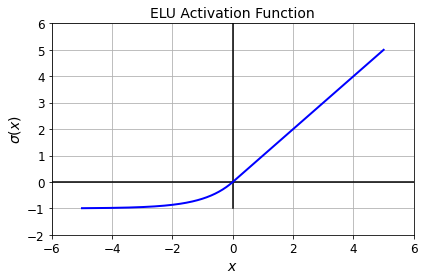

In [ ]:
z = np.linspace(-5, 5, 400)
plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-1.0, 6], 'k-')
plt.plot(z, elu(z), "b-", linewidth=2)
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
# plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("ELU Activation Function", fontsize=14)
plt.axis([-6, 6, -2.0, 6.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
save_fig("elu_plot")
plt.show()

Saving figure sin_plot


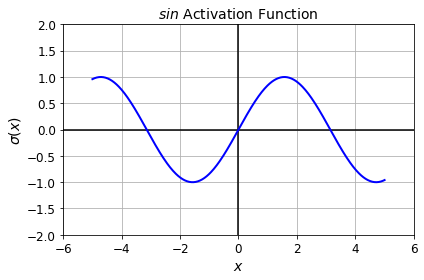

In [ ]:
z = np.linspace(-5, 5, 400)
plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-2.0, 6], 'k-')
plt.plot(z, sin(z), "b-", linewidth=2)
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
# plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("$\mathit{sin}$ Activation Function", fontsize=14)
plt.axis([-6, 6, -2.0, 2.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
save_fig("sin_plot")
plt.show()

Saving figure swish_plot


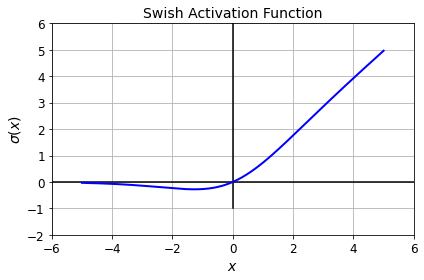

In [ ]:
z = np.linspace(-5, 5, 400)
plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-1.0, 6], 'k-')
plt.plot(z, swish(z), "b-", linewidth=2)
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
# plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Swish Activation Function", fontsize=14)
plt.axis([-6, 6, -2.0, 6.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
save_fig("swish_plot")
plt.show()

Saving figure adaptive_sigmoid_plot


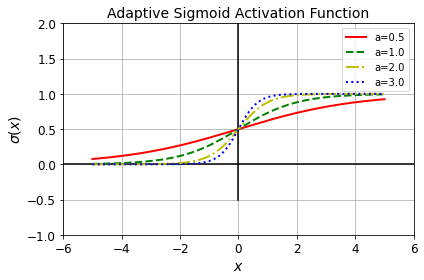

In [ ]:
z = np.linspace(-5, 5, 400)

plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 6], 'k-')

plt.plot(z, adaptive_sigmoid(z, a=0.5), "r-", linewidth=2, label="a=0.5")
plt.plot(z, adaptive_sigmoid(z, a=1.0), "g--", linewidth=2, label="a=1.0")
plt.plot(z, adaptive_sigmoid(z, a=2.0), "y-.", linewidth=2, label="a=2.0")
plt.plot(z, adaptive_sigmoid(z, a=3.0), "b:", linewidth=2, label="a=3.0")
plt.legend()
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
#plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Adaptive Sigmoid Activation Function", fontsize=14)
plt.axis([-6, 6, -1.0, 6.0])
plt.ylim(-1,2)
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
save_fig("adaptive_sigmoid_plot")
plt.show()

Saving figure adaptive_tanh_plot


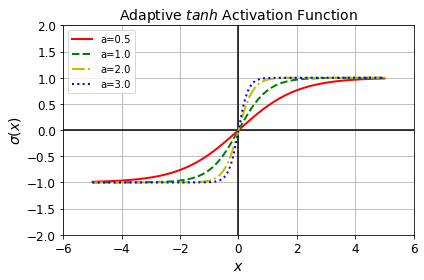

In [ ]:
z = np.linspace(-5, 5, 400)

plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-2.0, 2.0], 'k-')

plt.plot(z, adaptive_tanh(z, a=0.5), "r-", linewidth=2, label="a=0.5")
plt.plot(z, adaptive_tanh(z, a=1.0), "g--", linewidth=2, label="a=1.0")
plt.plot(z, adaptive_tanh(z, a=2.0), "y-.", linewidth=2, label="a=2.0")
plt.plot(z, adaptive_tanh(z, a=3.0), "b:", linewidth=2, label="a=3.0")
plt.legend()
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
#plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Adaptive $\mathit{tanh}$ Activation Function", fontsize=14)
plt.axis([-6, 6, -2.0, 2.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
save_fig("adaptive_tanh_plot")
plt.show()

Saving figure adaptive_relu_plot


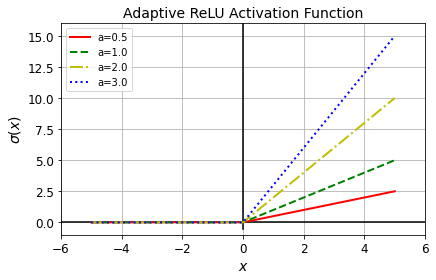

In [ ]:
z = np.linspace(-5, 5, 400)

plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 16], 'k-')

plt.plot(z, adaptive_relu(z, a=0.5), "r-", linewidth=2, label="a=0.5")
plt.plot(z, adaptive_relu(z, a=1.0), "g--", linewidth=2, label="a=1.0")
plt.plot(z, adaptive_relu(z, a=2.0), "y-.", linewidth=2, label="a=2.0")
plt.plot(z, adaptive_relu(z, a=3.0), "b:", linewidth=2, label="a=3.0")
plt.legend()
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
#plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Adaptive ReLU Activation Function", fontsize=14)
plt.axis([-6, 6, -1.0, 16.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
save_fig("adaptive_relu_plot")
plt.show()

Saving figure adaptive_leaky_relu_plot


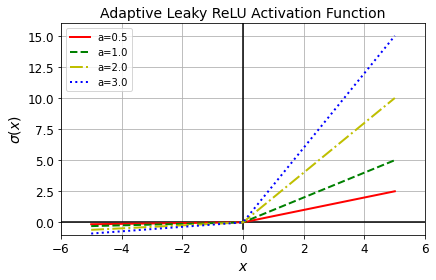

In [ ]:
z = np.linspace(-5, 5, 400)

plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 16], 'k-')

plt.plot(z, adaptive_leaky_relu(z, alpha=0.06, a=0.5), "r-", linewidth=2, label="a=0.5")
plt.plot(z, adaptive_leaky_relu(z, alpha=0.06, a=1.0), "g--", linewidth=2, label="a=1.0")
plt.plot(z, adaptive_leaky_relu(z, alpha=0.06, a=2.0), "y-.", linewidth=2, label="a=2.0")
plt.plot(z, adaptive_leaky_relu(z, alpha=0.06, a=3.0), "b:", linewidth=2, label="a=3.0")
plt.legend()
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
#plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Adaptive Leaky ReLU Activation Function", fontsize=14)
plt.axis([-6, 6, -1.0, 16.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
save_fig("adaptive_leaky_relu_plot")
plt.show()

Saving figure adaptive_elu_plot


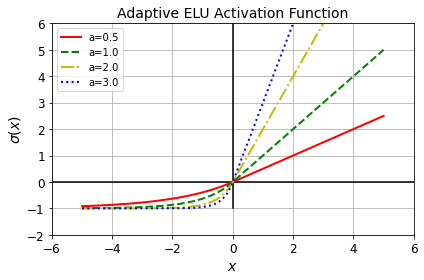

In [ ]:
z = np.linspace(-5, 5, 400)
plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-1.0, 6], 'k-')
plt.plot(z, adaptive_elu(z, a=0.5), "r-", linewidth=2, label="a=0.5")
plt.plot(z, adaptive_elu(z, a=1.0), "g--", linewidth=2, label="a=1.0")
plt.plot(z, adaptive_elu(z, a=2.0), "y-.", linewidth=2, label="a=2.0")
plt.plot(z, adaptive_elu(z, a=3.0), "b:", linewidth=2, label="a=3.0")
plt.legend()

plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
# plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Adaptive ELU Activation Function", fontsize=14)
plt.axis([-6, 6, -2.0, 6.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
save_fig("adaptive_elu_plot")
plt.show()

Saving figure adaptive_sin_plot


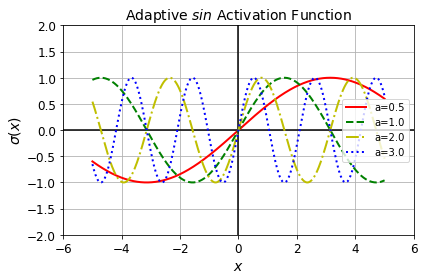

In [ ]:
z = np.linspace(-5, 5, 400)
plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-2.0, 6], 'k-')
plt.plot(z, adaptive_sin(z, a=0.5), "r-", linewidth=2, label="a=0.5")
plt.plot(z, adaptive_sin(z, a=1.0), "g--", linewidth=2, label="a=1.0")
plt.plot(z, adaptive_sin(z, a=2.0), "y-.", linewidth=2, label="a=2.0")
plt.plot(z, adaptive_sin(z, a=3.0), "b:", linewidth=2, label="a=3.0")
plt.legend()
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
# plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Adaptive $\mathit{sin}$ Activation Function", fontsize=14)
plt.axis([-6, 6, -2.0, 2.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
save_fig("adaptive_sin_plot")
plt.show()

Saving figure adaptive_swish_plot


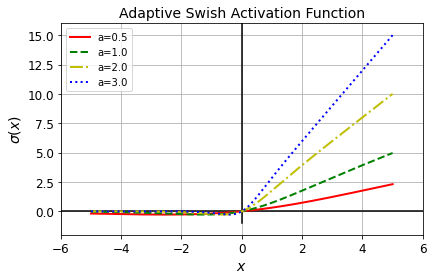

In [ ]:
z = np.linspace(-5, 5, 400)
plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-1.0, 16], 'k-')
plt.plot(z, adaptive_swish(z, a=0.5), "r-", linewidth=2, label="a=0.5")
plt.plot(z, adaptive_swish(z, a=1.0), "g--", linewidth=2, label="a=1.0")
plt.plot(z, adaptive_swish(z, a=2.0), "y-.", linewidth=2, label="a=2.0")
plt.plot(z, adaptive_swish(z, a=3.0), "b:", linewidth=2, label="a=3.0")
plt.legend()
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
# plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Adaptive Swish Activation Function", fontsize=14)
plt.axis([-6, 6, -2.0, 16.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
save_fig("adaptive_swish_plot")
plt.show()